1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [62]:
import numpy as np
import pandas as pd
import scipy.linalg as la
import matplotlib.pyplot as plt

N = 1000

x1 = np.random.normal(0,1,N)
x2 = np.random.normal(0,3,N) + x1
x3 = 2*x1+x2
data = np.array([x1,x2,x3])

In [63]:
# cov matrix
np.cov(data)
l, V = la.eig(np.cov(data))
print(f'eigenvalues \n{l}')
print(f'eigenvectors \n{V}')


eigenvalues 
[ 2.74776171e+01+0.j -8.06073460e-17+0.j  2.00894964e+00+0.j]
eigenvectors 
[[-0.11662456 -0.81649658  0.56544853]
 [-0.57590563 -0.40824829 -0.70828387]
 [-0.80915475  0.40824829  0.4226132 ]]


In [64]:

U, spectrum, Vt = la.svd(data)
m = U.shape[0]
# print(m)
n = Vt.shape[0]
# print(n)
D = np.zeros((m, n))
for i in range(min(n, 3)):
    D[i, i] = spectrum[i]
SVD = np.dot(U, np.dot(D, Vt))
print(SVD)

[[  0.51944868  -0.85359037  -1.16113988 ...  -1.06501817   2.3323692
   -0.25864165]
 [  4.86230846  -8.48905824  -3.51075735 ...   2.67207069   4.78286691
   -2.50626868]
 [  5.90120581 -10.19623899  -5.83303711 ...   0.54203434   9.44760531
   -3.02355199]]


[2.75192027e+01 2.00896899e+00 1.72191240e-31]
the third eigenvalues is so small it does not appear in the pie chart


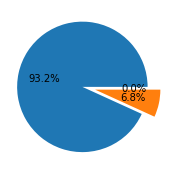

In [65]:
#check the percentage
l_svd = (spectrum**2)/(n-1)
V_svd = U
print(l_svd)
fig, ax = plt.subplots(figsize=(3,3))
ax.pie(l_svd, explode=(0.1,0.1,0.1), autopct='%1.1f%%')

print("the third eigenvalues is so small it does not appear in the pie chart")


In [66]:
#reduce dimensionality 
l_svd_r = l_svd.copy()
l_svd_r[2] = 0

print('removing the third eigenvalues we retain >99% of the variance')
print((l_svd[0]+l_svd[1])/sum(l_svd))

removing the third eigenvalues we retain >99% of the variance
1.0


In [68]:
U_pca = U[0:2,:]
data_pca = np.dot(U_pca, np.dot(D, Vt))
data_pca = np.concatenate((data_pca, np.zeros((1,N))))
print(data_pca.shape)
# print(data_pca)

(3, 1000)


0 1
0 2
1 2
0 1
0 2
1 2


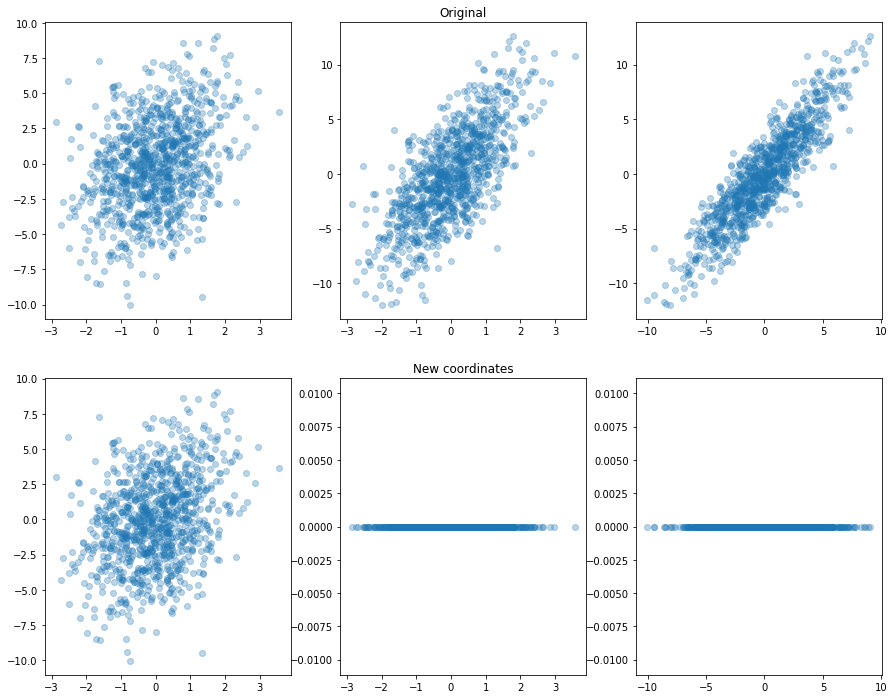

In [70]:
#plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (15, 12))
axes[0,1].set_title("Original")
axes[1,1].set_title("New coordinates")
idx_data = np.array([[0,1],[0,2],[1,2]])
X = [data, data_pca]

for i in range(2):
    x = X[i]
    for j in range(3):
#         print(j)
        idx0 = idx_data[j,0]
        idx1 = idx_data[j,1]
#         print(idx0, idx1)
        axes[i,j].scatter(x[idx0,:], x[idx1,:], alpha=0.3)


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [73]:
# N = 500
n = [np.random.randn(N)/50 for i in range(10)] 

data = np.vstack([data, n[0], n[1], n[2], n[3], n[4], n[5], n[6], n[7], n[8], n[9]])

# covariance matrix
cov_m = np.cov(data)

# eigenvectors of the covariance matrix
l, V = la.eig(cov_m)
i = l.argsort()[::-1]
l = l[i]
V = V[:,i]

# Find the eigenvectors and eigenvalues using SVD
U, spectrum, Vt = np.linalg.svd(data)

l_svd = spectrum**2/(N-1)
V_svd = U

i = l_svd.argsort()[::-1]
l_svd = l_svd[i]
V_svd = V_svd[:,i]

print (f"eigendecomposition {l}\n")
print (f"SVD: {l_svd}\n")

print (f"eigendecomposition{V}\n")
print (f"SVD:{V_svd}\n")

print("The two procedures yield similar results")

eigendecomposition [ 2.74776321e+01+0.j  2.00896008e+00+0.j  5.26590890e-04+0.j
  5.20323767e-04+0.j  5.04746157e-04+0.j  4.90968127e-04+0.j
  4.75482158e-04+0.j  4.61376065e-04+0.j  4.59811222e-04+0.j
  4.45509409e-04+0.j  4.39879060e-04+0.j  4.33102222e-04+0.j
  4.27624994e-04+0.j  4.21362628e-04+0.j  4.11326105e-04+0.j
  3.97957754e-04+0.j  3.94295558e-04+0.j  3.84964114e-04+0.j
  3.79677308e-04+0.j  3.72644036e-04+0.j  3.71650057e-04+0.j
  3.65049628e-04+0.j  3.55754832e-04+0.j  3.48915700e-04+0.j
  3.44054156e-04+0.j  3.40991866e-04+0.j  3.20066265e-04+0.j
  3.15596843e-04+0.j  3.14195805e-04+0.j  3.08442123e-04+0.j
  2.89587794e-04+0.j  2.80332994e-04+0.j -1.12677902e-15+0.j]

SVD: [2.75192181e+01 2.00897943e+00 5.26972771e-04 5.23168084e-04
 5.05514905e-04 4.92077061e-04 4.75499081e-04 4.62038948e-04
 4.59927017e-04 4.45666665e-04 4.39994470e-04 4.33102620e-04
 4.28258993e-04 4.21564385e-04 4.12530794e-04 3.98941299e-04
 3.95186700e-04 3.88211884e-04 3.80114650e-04 3.72659819e-0

The percentual of dataset variability using the 2 principal components is 99.95965123009809%
The percentual of dataset variability using the 12 principal components is 99.97578015183049%


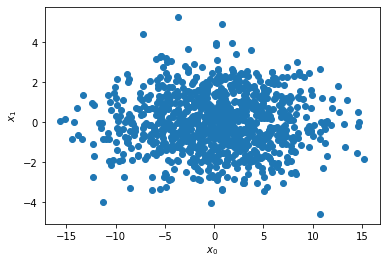

In [75]:
p_pc2 = np.real(np.sum(l[:2])/np.sum(l))*100
p_pc12 = np.real(np.sum(l[:12])/np.sum(l))*100
print(f"The percentual of dataset variability using the 2 principal components is {p_pc2}%")
print(f"The percentual of dataset variability using the 12 principal components is {p_pc12}%")

# Redefine the data 
V_pc = V[:,:2]
data_pc = np.dot(V_pc.T, data)

# scatter plot for the first two principal components 
plt.figure()
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.scatter(data_pc[0,:], data_pc[1,:])

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [ ]:
# get the dataset and its description on the proper data directory
!curl.exe https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
!curl.exe https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 
    
# I've manually downloaded this dataset

In [83]:
import csv
import pandas as pd

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data", header=None, usecols=np.r_[0:10])
data = data.T

eigendecomposition [6.57979140e+03+0.j 3.85387048e+03+0.j 2.01638313e+03+0.j
 1.32675968e+03+0.j 6.10187259e+02+0.j 4.33599171e+02+0.j
 1.17330074e+02+0.j 8.63965822e-02+0.j 1.07363851e-02+0.j
 3.85322859e-04+0.j]

eigendecomposition[[-3.27812305e-01 -1.34406332e-01  6.55078481e-02  8.63988253e-01
   9.45511967e-02 -1.98552026e-02  3.38166662e-01  3.99907112e-03
  -4.54836725e-04  4.57080123e-05]
 [-1.13810001e-01 -5.38837224e-02 -1.89938175e-02  3.19766485e-01
  -1.97548493e-02  2.32592322e-02 -9.38307839e-01  1.33847863e-02
   6.74902809e-04 -5.73158422e-05]
 [-3.06076690e-03  6.59372017e-04  1.05931761e-03  6.93028658e-03
   2.65185255e-03  1.33441545e-04 -1.08823228e-02 -9.27765187e-01
  -3.72229862e-01  2.26331399e-02]
 [ 9.27109146e-04 -2.58205308e-04 -5.10399700e-04 -2.60555110e-03
  -1.53899865e-03 -3.46437681e-05  3.06287144e-03  3.22020557e-01
  -7.69222364e-01  5.51887659e-01]
 [ 5.21882399e-04 -1.52710005e-04 -2.94635944e-04 -1.51275933e-03
  -9.19340567e-04 -2.21501607e-05

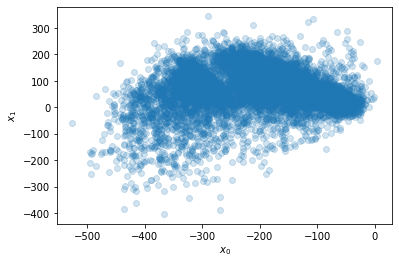

In [86]:
cov_m = np.cov(data)

l, V = la.eig(cov_m)
i = l.argsort()[::-1]
l = l[i]
V = V[:,i]

print(f"eigendecomposition {l}\n")
print(f"eigendecomposition{V}\n")

p_pc2 = np.real(np.sum(l[:2])/np.sum(l))*100
p_pc6 = np.real(np.sum(l[:6])/np.sum(l))*100
print(f"dataset variability using 2 principal components is {p_pc2}%")
print(f"dataset variability using 6 principal components is {p_pc6}%")

V_pc = V[:,:2]
data_pc = np.dot(V_pc.T, data)

# scatter plot for the first two principal components 
plt.figure()
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.scatter(data_pc[0,:], data_pc[1,:], alpha=0.2)